#Data Processes second assignment (first part)

####CAMPILLO MORALES Salvador
####HUC-LHUILLERY Alexia
####GONG Seong-Min
####TRIBOUT Antoine

In [ ]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import hashlib
from sklearn.linear_model import LinearRegression
from google.colab.data_table import DataTable
from sklearn.metrics import r2_score
DataTable.max_columns = 50
from sklearn.model_selection import cross_val_score

In [ ]:
## PART 1: LOADING, INSPECTION, FIRST PROCESSING AND MERGING OF 
##  -breast_cancer_data.xlsx, breast_cancer_data_2.xlsx,
##  -breast_cancer_data_tnm.csv and breast_cancer_data_tnm_2.csv

#breast_cancer_data.xlsx, breast_cancer_data_2.xlsx
df_bcd_s1 = pd.concat((map(pd.read_excel, ['/breast_cancer_data.xlsx', '/breast_cancer_data_2.xlsx'])))
print(df_bcd_s1.head())
print(df_bcd_s1.shape)
print(df_bcd_s1.dtypes)
print(df_bcd_s1.isnull().sum())
print(df_bcd_s1.describe())

# Unnamed: 0 is an alphabetic incremental coding for instances, completely unuseful for our purposes. We are going to delete it
df_bcd_s1.drop('Unnamed: 0', axis=1, inplace=True)

# Side is a textual variable that is almost completely empty. We are going to delete it, as it doesn't contain almost any 
# potentially useful information, nor his values can be used to extrapolate the rest of missing values
df_bcd_s1.drop('side', axis=1, inplace=True)

#If we have some duplicated instances, we are going to delete then
df_bcd_s1=df_bcd_s1.drop_duplicates()

#breast_cancer_data_tnm.csv, breast_cancer_data_tnm_2.csv
df_bcd_s2 = pd.concat(map(pd.read_csv, ["/breast_cancer_data_tnm.csv", "/breast_cancer_data_tnm_2.csv"]), ignore_index=True)
print(df_bcd_s2.head())
print(df_bcd_s2.shape)
print(df_bcd_s2.dtypes)
print(df_bcd_s2.isnull().sum())
print(df_bcd_s2.describe())

#remove cases of multiple tumors within df_bcd_s2
df_bcd_s2_filter=df_bcd_s2['ehr']
df_bcd_s2_filter= df_bcd_s2_filter[df_bcd_s2_filter.duplicated()]
df_bcd_s2 = df_bcd_s2.drop(df_bcd_s2[df_bcd_s2['ehr'].isin(df_bcd_s2_filter)].index)
print(df_bcd_s2.shape)

# merging of both dataframes, using an inner join (taking only ehr's that are present in both types of datasets). If there are ehr's
# that are present in one dataset but not in the other, we are not going to take that in consideration. 
df_bcd = pd.merge(left=df_bcd_s1,right=df_bcd_s2, how='inner', left_on='ehr', right_on='ehr')
print(df_bcd.head())

# some preliminary descriptive analysis.
print(df_bcd.shape)
print(df_bcd.dtypes)
print(df_bcd.isnull().sum())
print(df_bcd.describe())
display(df_bcd)


  Unnamed: 0   ehr side neoadjuvant  grade  invasive  er_positive  \
0         AA  6849  NaN          no    1.0       1.0          1.0   
1         AB   268  NaN          no    NaN       1.0          1.0   
2         AC  1458  NaN          no    1.0       1.0          1.0   
3         AD   268  NaN          no    NaN       1.0          1.0   
4         AE  2013  NaN         yes    3.0       1.0          1.0   

   pr_positive  her2_positive  ki67  ... diagnosis_date death_date  \
0          1.0            1.0   NaN  ...     2016-08-23        NaN   
1          1.0            0.0   NaN  ...     2015-09-05        NaN   
2          1.0            0.0   0.0  ...     2017-03-01        NaN   
3          1.0            0.0   NaN  ...     2015-09-05        NaN   
4          1.0            1.0  17.0  ...     2014-08-31        NaN   

  recurrence_year  menarche_age  menopause_age  pregnancy  abort  birth  \
0             NaN          17.0           51.0        2.0    0.0      2   
1             

,ehr,neoadjuvant,grade,invasive,er_positive,pr_positive,her2_positive,ki67,birth_date,diagnosis_date,...,birth,caesarean,hist_type,n_tumor,t,n,m,t_after_neoadj,n_after_neoadj,m_after_neoadj
0,2013,yes,3.0,1.0,1.0,1.0,1.0,17.0,1977-08-19,2014-08-31,...,-1,NaN,ductal,1,2,1.0,1.0,1,2.0,0.0
1,1350,no,2.0,1.0,0.0,1.0,0.0,44.0,1951-04-02,2003-05-24,...,3,NaN,ductal,1,1,0.0,0.0,NaN,NaN,NaN
2,5850,no,1.0,1.0,1.0,1.0,0.0,10.0,1958-11-12,2020-09-05,...,2,NaN,unknown,1,1,0.0,0.0,NaN,NaN,NaN
3,2470,no,2.0,1.0,1.0,0.0,0.0,0.0,1941-12-06,2016-01-12,...,-1,NaN,lobular,1,0,0.0,0.0,NaN,NaN,NaN
4,5380,no,1.0,1.0,1.0,1.0,0.0,20.0,1953-04-15,2012-12-02,...,-1,NaN,unknown,1,1,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6647,yes,NaN,1.0,1.0,1.0,0.0,NaN,1984-01-29,2014-05-22,...,-1,NaN,ductal,1,NaN,NaN,NaN,2.0,2.0,0.0
221,768,no,NaN,NaN,1.0,1.0,0.0,NaN,1953-03-12,1997-10-25,...,-1,NaN,unknown,1,X,X,1.0,NaN,NaN,NaN
222,4534,no,NaN,1.0,NaN,NaN,0.0,NaN,1959-06-25,2003-11-10,...,2,NaN,ductal,1,2,0,0.0,NaN,NaN,NaN
223,7062,no,NaN,1.0,1.0,1.0,0.0,0.0,1971-03-21,2020-11-07,...,-1,NaN,ductal,1,1,0,0.0,NaN,NaN,NaN


In [ ]:
## PART 2: PROCESSING EHR/DATES (12-03: salva)

# Expressing information contained in dates as numbers provides us data that can be used more easily as an input in m-l algorithms.
# Anonymization is a main issue when working with health records. 
# Malitious agents can recover sensitive information about patients using variables as ehr or relevant dates.
# So it is a good practice to delete sensitive data once extracted relevant information in a way preventing that possibility. 

# Transform birth_date, diagnosis_date and death_date to datetimes. 
df_bcd['birth_date'] = pd.to_datetime(df_bcd['birth_date'])
df_bcd['diagnosis_date'] = pd.to_datetime(df_bcd['diagnosis_date'])
df_bcd['death_date'] = pd.to_datetime(df_bcd['death_date'])

# Analyze diagnosis_date, birth_date and death_date. If there are instances with not feasible dates (for example, in the future) we
# are going to supress them, as they could be noisy instances. We are going to use 12-01-2022 as reference date 
df_d = df_bcd[(pd.to_datetime(df_bcd['diagnosis_date'])> "2022-11")].index
df_de = df_bcd[(pd.to_datetime(df_bcd['death_date'])> "2022-11")].index
df_b = df_bcd[(pd.to_datetime(df_bcd['birth_date'])> "2022-11")].index
# We get this kind of abnormality for some diagnosis dates. 
df_bcd.drop(df_d , inplace=True)
print(df_bcd.shape)

# For EHR's, we are going to hash values, ensuring then that original ones can't be recovered.
# repr(val).encode() -> The reason for this is that methods like md5 uses to accept only binary inputs.
df_bcd['h_ehr'] = [hashlib.md5(repr(val).encode()).hexdigest() for val in df_bcd['ehr']]
df_bcd.drop('ehr', axis=1, inplace=True)
new_ehr=df_bcd.pop('h_ehr')
df_bcd.insert(0,'ehr',new_ehr)

# Check that, for all cases, diagnosis_date is earlier than death_date. If is not the case, we are going to flip both dates
# Transform new reordered variables to datetimes.
df_bcd['diagnosis_date_ro']=[df_bcd.iloc[i]['diagnosis_date'] if (df_bcd.iloc[i]['diagnosis_date']-df_bcd.iloc[i]['death_date'])/np.timedelta64(1,'Y')<0 
                            or pd.isnull(df_bcd.iloc[i]['death_date'])==True  else df_bcd.iloc[i]['death_date'] for i in range(0,len(df_bcd))]
df_bcd['death_date_ro']=[df_bcd.iloc[i]['death_date'] if (df_bcd.iloc[i]['diagnosis_date']-df_bcd.iloc[i]['death_date'])/np.timedelta64(1,'Y')<0 
                            or pd.isnull(df_bcd.iloc[i]['death_date']) else df_bcd.iloc[i]['diagnosis_date'] for i in range(0,len(df_bcd))]
df_bcd['diagnosis_date_ro'] = pd.to_datetime(df_bcd['diagnosis_date_ro'])
df_bcd['death_date_ro'] = pd.to_datetime(df_bcd['death_date_ro'])

# We are going to obtain approximate dates for recurrence_years. 
# Consideration 1. If bdc_df.diagnosis_date.year and bcd_df.death_date.year are very close and
# there is also a recurrence_year value, we consider death date as the recurrence_date, in order to avoid setting this
# approximate date after death or before diagnosis. If is not the case, we  are going to consider 1th of June of the corresponding year as the approximate date
# Consideration 2. If it is any case in which recurrence_year is out of the bounds defined by diagnosis_date and death_date, we don't consider that value.
df_bcd['recurrence_date']=[datetime.date(int(df_bcd.iloc[i]['recurrence_year']),6,1) if (df_bcd.iloc[i].death_date_ro-df_bcd.iloc[i].diagnosis_date_ro)/np.timedelta64(1,'Y')>1 
                           and (pd.isnull(df_bcd.iloc[i]['recurrence_year'])==False and pd.isnull(df_bcd.iloc[i]['death_date_ro'])==False) 
                           or ((pd.isnull(df_bcd.iloc[i]['recurrence_year'])==False and pd.isnull(df_bcd.iloc[i]['death_date'])==True)) else df_bcd.iloc[i]['death_date_ro'] 
                           if pd.isnull(df_bcd.iloc[i]['recurrence_year'])==False 
                           and pd.isnull(df_bcd.iloc[i]['death_date_ro'])==False 
                           else np.datetime64('NaT') for i in range(0,len(df_bcd))]
df_bcd['recurrence_date'] =pd.to_datetime(df_bcd['recurrence_date'])
df_bcd['recurrence_date'] =[df_bcd.iloc[i]['recurrence_date'] if (df_bcd.iloc[i]['recurrence_date']-df_bcd.iloc[i]['death_date'])/np.timedelta64(1,'Y')<0 
                            or pd.isnull(df_bcd.iloc[i]['death_date']) or (df_bcd.iloc[i]['recurrence_date']-df_bcd.iloc[i]['diagnosis_date'])/np.timedelta64(1,'Y')>0 else np.datetime64('NaT') for i in range(0,len(df_bcd))]

# create new fields for ages at diagnosis, death and possible relapse, containing the information expressed in the date fields.
df_bcd['age_at_diagnosis']=round((df_bcd.diagnosis_date_ro-df_bcd.birth_date)/np.timedelta64(1,'Y'),2)
df_bcd['age_at_death']=round((df_bcd.death_date_ro-df_bcd.birth_date)/np.timedelta64(1,'Y'),2)
df_bcd['age_at_relapse']=round((df_bcd.recurrence_date-df_bcd.birth_date)/np.timedelta64(1,'Y'),2)
df_bcd['current_age']=round((pd.to_datetime("today")-df_bcd.birth_date)/np.timedelta64(1,'Y'),2)
df_bcd['current_age']=[np.nan if pd.isnull(df_bcd.iloc[i]['age_at_death'])==False else df_bcd.iloc[i]['current_age'] for i in range(0,len(df_bcd))]

# create two binary variables: death_recorded and relapse_recorded
df_bcd['death_recorded']=[1 if pd.isnull(df_bcd.iloc[i]['age_at_death'])==False else 0 for i in range(0,len(df_bcd))]
df_bcd['relapse_recorded']=[1 if pd.isnull(df_bcd.iloc[i]['age_at_relapse'])==False else 0 for i in range(0,len(df_bcd))]

#finally, we delete the dates
df_bcd.drop('recurrence_date', axis=1, inplace=True)
df_bcd.drop('birth_date', axis=1, inplace=True)
df_bcd.drop('death_date', axis=1, inplace=True)
df_bcd.drop('diagnosis_date', axis=1, inplace=True)
df_bcd.drop('diagnosis_date_ro', axis=1, inplace=True)
df_bcd.drop('death_date_ro', axis=1, inplace=True)
df_bcd.drop('recurrence_year', axis=1, inplace=True)
print(df_bcd.head())
display(df_bcd)

(220, 26)
                                ehr neoadjuvant  grade  invasive  er_positive  \
0  8038da89e49ac5eabb489cfc6cea9fc1         yes    3.0       1.0          1.0   
1  861dc9bd7f4e7dd3cccd534d0ae2a2e9          no    2.0       1.0          0.0   
2  234a1273487bf7b2e2061b9b56373a29          no    1.0       1.0          1.0   
3  7cc234202e98d2722580858573fd0817          no    2.0       1.0          1.0   
4  b3dd760eb02d2e669c604f6b2f1e803f          no    1.0       1.0          1.0   

   pr_positive  her2_positive  ki67  menarche_age  menopause_age  ...    m  \
0          1.0            1.0  17.0           NaN            NaN  ...  1.0   
1          1.0            0.0  44.0          14.0            NaN  ...  0.0   
2          1.0            0.0  10.0          15.0           58.0  ...  0.0   
3          0.0            0.0   0.0          12.0            NaN  ...  0.0   
4          1.0            0.0  20.0          14.0           49.0  ...  0.0   

   t_after_neoadj  n_after_neoadj 

,ehr,neoadjuvant,grade,invasive,er_positive,pr_positive,her2_positive,ki67,menarche_age,menopause_age,...,m,t_after_neoadj,n_after_neoadj,m_after_neoadj,age_at_diagnosis,age_at_death,age_at_relapse,current_age,death_recorded,relapse_recorded
0,8038da89e49ac5eabb489cfc6cea9fc1,yes,3.0,1.0,1.0,1.0,1.0,17.0,NaN,NaN,...,1.0,1,2.0,0.0,37.03,NaN,NaN,45.33,0,0
1,861dc9bd7f4e7dd3cccd534d0ae2a2e9,no,2.0,1.0,0.0,1.0,0.0,44.0,14.0,NaN,...,0.0,NaN,NaN,NaN,52.14,71.11,NaN,NaN,1,0
2,234a1273487bf7b2e2061b9b56373a29,no,1.0,1.0,1.0,1.0,0.0,10.0,15.0,58.0,...,0.0,NaN,NaN,NaN,61.82,NaN,NaN,64.10,0,0
3,7cc234202e98d2722580858573fd0817,no,2.0,1.0,1.0,0.0,0.0,0.0,12.0,NaN,...,0.0,NaN,NaN,NaN,74.10,NaN,NaN,81.04,0,0
4,b3dd760eb02d2e669c604f6b2f1e803f,no,1.0,1.0,1.0,1.0,0.0,20.0,14.0,49.0,...,0.0,NaN,NaN,NaN,59.63,NaN,NaN,69.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,8ce8b102d40392a688f8c04b3cd6cae0,yes,NaN,1.0,1.0,1.0,0.0,NaN,12.0,NaN,...,NaN,2.0,2.0,0.0,30.31,NaN,NaN,38.89,0,0
221,3a835d3215755c435ef4fe9965a3f2a0,no,NaN,NaN,1.0,1.0,0.0,NaN,13.0,NaN,...,1.0,NaN,NaN,NaN,44.62,NaN,57.22,69.77,0,1
222,72cad9e1f9ae79872b8d6ac34fc2851c,no,NaN,1.0,NaN,NaN,0.0,NaN,11.0,40.0,...,0.0,NaN,NaN,NaN,44.38,NaN,NaN,63.49,0,0
223,6cf75a28ed72a43ef7ca1b66ff345859,no,NaN,1.0,1.0,1.0,0.0,0.0,16.0,NaN,...,0.0,NaN,NaN,NaN,49.64,NaN,NaN,51.75,0,0


In [ ]:
## PART 3: PROCESSING DATATYPES OF CATEGORICAL VARIABLES (12-03: salva)

#First, we're going to analyze the different values we have for tumor classification.
print(df_bcd['t'].unique())
print(df_bcd['n'].unique())
print(df_bcd['m'].unique())

# We have seven valid values (0,1,2,3,4,X,IS). 
# Transform this three variables into cathegorical ones, having six different levels
# First, we are going to replace floats by strings in df_bcd['n']
df_bcd['n']=df_bcd['n'].replace([0],'0')
df_bcd['n']=df_bcd['n'].replace([1.0],'1')
df_bcd['n']=df_bcd['n'].replace([2.0],'2')
df_bcd['n']=df_bcd['n'].replace([3.0],'3')
df_bcd['n']=df_bcd['n'].replace([2.0],'2')
df_bcd['m']=df_bcd['m'].replace([0.],'0')
df_bcd['m']=df_bcd['m'].replace([1.],'1')
print(df_bcd['n'].unique())
print(df_bcd['m'].unique())
# Then, we can aldeady procceed with datatype transformation
df_bcd['n'] = df_bcd.n.astype('category')
df_bcd['m'] = df_bcd.m.astype('category')
df_bcd['t'] = df_bcd.t.astype('category')
print(df_bcd.isnull().sum())

#The same, but with classification after neoadjuvant treatment
print(df_bcd['t_after_neoadj'].unique())
print(df_bcd['n_after_neoadj'].unique())
print(df_bcd['m_after_neoadj'].unique())
df_bcd['t_after_neoadj']=df_bcd['t_after_neoadj'].replace([0],'0')
df_bcd['t_after_neoadj']=df_bcd['t_after_neoadj'].replace([1.0],'1')
df_bcd['t_after_neoadj']=df_bcd['t_after_neoadj'].replace([2.0],'2')
df_bcd['n_after_neoadj']=df_bcd['n_after_neoadj'].replace([0],'0')
df_bcd['n_after_neoadj']=df_bcd['n_after_neoadj'].replace([1.0],'1')
df_bcd['n_after_neoadj']=df_bcd['n_after_neoadj'].replace([2.0],'2')
df_bcd['n_after_neoadj']=df_bcd['n_after_neoadj'].replace([3.0],'3')
df_bcd['m_after_neoadj']=df_bcd['m_after_neoadj'].replace([0],'0')
df_bcd['m_after_neoadj']=df_bcd['m_after_neoadj'].replace([1.0],'1')


#Categorical transformation and homogeneization for binary variables in breast_cancer_data.xlsx, breast_cancer_data_2.xlsx

# neoadjuvant
print(df_bcd['neoadjuvant'].unique())
df_bcd['neoadjuvant'] = df_bcd['neoadjuvant'].replace('yes', '1')
df_bcd['neoadjuvant'] = df_bcd['neoadjuvant'].replace('no', '0')
df_bcd['neoadjuvant'] = df_bcd.neoadjuvant.astype('category')

# invasive
print(df_bcd['invasive'].unique())
df_bcd['invasive'] = df_bcd.invasive.astype('category')
df_bcd['invasive'].replace(1.,'1',inplace=True)

# er_positive
print(df_bcd['er_positive'].unique())
df_bcd['er_positive'] = df_bcd.er_positive.astype('category')
df_bcd['er_positive'].replace(0.,'0',inplace=True)
df_bcd['er_positive'].replace(1.0,'1',inplace=True)

# pr_positive
print(df_bcd['pr_positive'].unique())
df_bcd['pr_positive'] = df_bcd.pr_positive.astype('category')
df_bcd['pr_positive'].replace(0.,'0',inplace=True)
df_bcd['pr_positive'].replace(1.0,'1',inplace=True)

# her2_positive
print(df_bcd['her2_positive'].unique())
df_bcd['her2_positive'] = df_bcd.her2_positive.astype('category')
df_bcd['her2_positive'].replace(0.,'0',inplace=True)
df_bcd['her2_positive'].replace(1.0,'1',inplace=True)

#hist_type
print(df_bcd['hist_type'].unique())
df_bcd['hist_type'] = df_bcd.hist_type.astype('category')

# grade
print(df_bcd['grade'].unique())
df_bcd['grade'] = df_bcd.grade.astype('category')
df_bcd['grade'].replace(3.,'3',inplace=True)
df_bcd['grade'].replace(2.,'2',inplace=True)
df_bcd['grade'].replace(1.,'1',inplace=True)


#death_recorded and relapse_recorded
df_bcd['death_recorded'] = df_bcd.death_recorded.astype('category')
df_bcd['relapse_recorded'] = df_bcd.relapse_recorded.astype('category')
print(df_bcd.dtypes)
display(df_bcd)


['2' '1' '0' 'IS' nan '3' '4' 'X']
[1.0 0.0 2.0 3.0 nan '1' '2' '0' '3' 'X']
[ 1.  0. nan]
['1' '0' '2' '3' nan 'X']
['1' '0' nan]
ehr                   0
neoadjuvant           1
grade                87
invasive             32
er_positive          22
pr_positive          25
her2_positive        40
ki67                 64
menarche_age         49
menopause_age       140
pregnancy            92
abort               108
birth                 0
caesarean           206
hist_type             0
n_tumor               0
t                     4
n                     6
m                     4
t_after_neoadj      189
n_after_neoadj      189
m_after_neoadj      189
age_at_diagnosis      0
age_at_death        197
age_at_relapse      191
current_age          23
death_recorded        0
relapse_recorded      0
dtype: int64
['1' nan '0' '3' '2' 'IS' 1.0 2.0 0.0]
[ 2. nan  0.  3.  1.]
[ 0. nan  1.]
['yes' 'no' nan]
[ 1. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 1.  0. nan]
['ductal' 'unknown' 'lobular']
[ 3.  2. 

,ehr,neoadjuvant,grade,invasive,er_positive,pr_positive,her2_positive,ki67,menarche_age,menopause_age,...,m,t_after_neoadj,n_after_neoadj,m_after_neoadj,age_at_diagnosis,age_at_death,age_at_relapse,current_age,death_recorded,relapse_recorded
0,8038da89e49ac5eabb489cfc6cea9fc1,1,3,1,1,1,1,17.0,NaN,NaN,...,1,1,2,0,37.03,NaN,NaN,45.33,0,0
1,861dc9bd7f4e7dd3cccd534d0ae2a2e9,0,2,1,0,1,0,44.0,14.0,NaN,...,0,NaN,NaN,NaN,52.14,71.11,NaN,NaN,1,0
2,234a1273487bf7b2e2061b9b56373a29,0,1,1,1,1,0,10.0,15.0,58.0,...,0,NaN,NaN,NaN,61.82,NaN,NaN,64.10,0,0
3,7cc234202e98d2722580858573fd0817,0,2,1,1,0,0,0.0,12.0,NaN,...,0,NaN,NaN,NaN,74.10,NaN,NaN,81.04,0,0
4,b3dd760eb02d2e669c604f6b2f1e803f,0,1,1,1,1,0,20.0,14.0,49.0,...,0,NaN,NaN,NaN,59.63,NaN,NaN,69.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,8ce8b102d40392a688f8c04b3cd6cae0,1,NaN,1,1,1,0,NaN,12.0,NaN,...,NaN,2,2,0,30.31,NaN,NaN,38.89,0,0
221,3a835d3215755c435ef4fe9965a3f2a0,0,NaN,NaN,1,1,0,NaN,13.0,NaN,...,1,NaN,NaN,NaN,44.62,NaN,57.22,69.77,0,1
222,72cad9e1f9ae79872b8d6ac34fc2851c,0,NaN,1,NaN,NaN,0,NaN,11.0,40.0,...,0,NaN,NaN,NaN,44.38,NaN,NaN,63.49,0,0
223,6cf75a28ed72a43ef7ca1b66ff345859,0,NaN,1,1,1,0,0.0,16.0,NaN,...,0,NaN,NaN,NaN,49.64,NaN,NaN,51.75,0,0


In [ ]:
## PART 4: DEALING WITH MISSING VALUES IN THE NUMERICAL VARIABLES - NO ML MODELS.

# pregnancy, abort, birth, caesarea. 
print(df_bcd['pregnancy'].unique())
print(df_bcd['abort'].unique())
print(df_bcd['caesarean'].unique())
print(df_bcd['birth'].unique())

# we assume that the -1 values in the birth variable are actual missing values
df_bcd['birth'] = df_bcd['birth'].replace(-1,np.nan)


# we are going to look for cases in which we can recover some values for p,a,b,c
# using the value of the other three variables as reference and some logical inference
# if pregnancy=0, then abort,birth,caesarean=0
df_bcd['birth']= [0.0 if df_bcd.iloc[i]['pregnancy']==0 else df_bcd.iloc[i]['birth'] for i in range(0,len(df_bcd))]
df_bcd['abort']= [0.0 if df_bcd.iloc[i]['pregnancy']==0 else df_bcd.iloc[i]['abort'] for i in range(0,len(df_bcd))]
df_bcd['caesarean']= [0.0 if df_bcd.iloc[i]['pregnancy']==0 else df_bcd.iloc[i]['caesarean'] for i in range(0,len(df_bcd))]
# if we have non-missing data for pregnancies and births regarding a specific value, we can compute the number of abortions
df_bcd['abort']= [df_bcd.iloc[i]['pregnancy']-df_bcd.iloc[i]['birth'] if type(df_bcd.iloc[i]['pregnancy'])==np.float64 and type(df_bcd.iloc[i]['birth'])==np.float64 
              else df_bcd.iloc[i]['abort'] for i in range(0,len(df_bcd))]
# if we know that the number of pregnancies is the same that the number of caesareans, we know the number of abortions and the number of births.
df_bcd['abort']= [0.0 if df_bcd.iloc[i]['pregnancy']-df_bcd.iloc[i]['caesarean']==0
              else df_bcd.iloc[i]['abort'] for i in range(0,len(df_bcd))]
df_bcd['birth']= [df_bcd.iloc[i]['pregnancy'] if df_bcd.iloc[i]['pregnancy']-df_bcd.iloc[i]['caesarean']==0
              else df_bcd.iloc[i]['birth'] for i in range(0,len(df_bcd))]
# if we know that there are not births, there are not caesareans
df_bcd['caesarean']= [0.0 if df_bcd.iloc[i]['birth']==0
              else df_bcd.iloc[i]['caesarean'] for i in range(0,len(df_bcd))]

# finally, we are going to update two instances
# tumor_ID=206. caesarean=2 and birth,abort,pregnancy=NaN. We are going to supose that there are not more pregnancies
df_bcd.at[206,'birth']=2.0
df_bcd.at[206,'pregnancy']=2.0
df_bcd.at[206,'abort']=0.0
#tumor_ID=68, birth=3, we are going to assume that pregnancy=3
df_bcd.at[68,'pregnancy']=3.0

# menarche_age
# we have relatively few missing values and we don't have other variables conditioning it, so we are going to simply
# replace missing values with the median (instead of the mean, in order to avoid distorsion by possible outliers).
df_bcd['menarche_age'].fillna(value=round(df_bcd['menarche_age'].median(),2), inplace=True)

# menopause age
# unlike in menarche_age, we can't assume that this variable is applicable to all patients. There can be a significant
# portion of still fertile patients in our sample. We are going to act as follows: we are going to assign a menopause
# age equal to the median for all patients older than that age, and we are also going to create a binary variable 
# (menopause at diagnosis) checking for all cases if age_at_diagnosis>age at menopause or age_at_diagnosis>median(menopause_age)
df_bcd['menopause_age']= [round(df_bcd['menopause_age'].median(),2) if (df_bcd.iloc[i]['current_age']>df_bcd['menopause_age'].median() 
                            or df_bcd.iloc[i]['age_at_death']>df_bcd['menopause_age'].median()) and pd.isnull(df_bcd.iloc[i]['menopause_age']) 
                          else df_bcd.iloc[i]['menopause_age'] for i in range(0,len(df_bcd))]
df_bcd['menopause_at_diagnosis']=[1 if df_bcd.iloc[i]['menopause_age']<df_bcd.iloc[i]['age_at_diagnosis'] else 0 for  i in range(0,len(df_bcd))]
df_bcd['menopause_at_diagnosis'] = df_bcd.menopause_at_diagnosis.astype('category')

# pregnancy, birth and abort 
# we can assume that, according to the repartition of the columns, the null values correspond to a null number of
# pregnancy for the patient. We are also going to assume that there are not caesareans when not recorded.
df_bcd['pregnancy'].fillna(0, inplace=True)
df_bcd['abort'].fillna(0, inplace=True)
df_bcd['birth'].fillna(0, inplace=True)
df_bcd['caesarean'].fillna(0, inplace=True)

# transforming floats to ingegers
df_bcd['pregnancy'] = df_bcd['pregnancy'].astype(int)
df_bcd['abort'] = df_bcd['abort'].astype(int)
df_bcd['birth'] = df_bcd['birth'].astype(int)
df_bcd['caesarean'] = df_bcd['caesarean'].astype(int)


display(df_bcd)

[nan  3.  2.  0.  6.  4.  1.  5.]
[nan  0.  1.  2.  3.]
[nan  0.  1.  2.]
[-1  3  2  0  6  1  4  5]


,ehr,neoadjuvant,grade,invasive,er_positive,pr_positive,her2_positive,ki67,menarche_age,menopause_age,...,t_after_neoadj,n_after_neoadj,m_after_neoadj,age_at_diagnosis,age_at_death,age_at_relapse,current_age,death_recorded,relapse_recorded,menopause_at_diagnosis
0,8038da89e49ac5eabb489cfc6cea9fc1,1,3,1,1,1,1,17.0,13.0,NaN,...,1,2,0,37.03,NaN,NaN,45.33,0,0,0
1,861dc9bd7f4e7dd3cccd534d0ae2a2e9,0,2,1,0,1,0,44.0,14.0,50.0,...,NaN,NaN,NaN,52.14,71.11,NaN,NaN,1,0,1
2,234a1273487bf7b2e2061b9b56373a29,0,1,1,1,1,0,10.0,15.0,58.0,...,NaN,NaN,NaN,61.82,NaN,NaN,64.10,0,0,1
3,7cc234202e98d2722580858573fd0817,0,2,1,1,0,0,0.0,12.0,50.0,...,NaN,NaN,NaN,74.10,NaN,NaN,81.04,0,0,1
4,b3dd760eb02d2e669c604f6b2f1e803f,0,1,1,1,1,0,20.0,14.0,49.0,...,NaN,NaN,NaN,59.63,NaN,NaN,69.68,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,8ce8b102d40392a688f8c04b3cd6cae0,1,NaN,1,1,1,0,NaN,12.0,NaN,...,2,2,0,30.31,NaN,NaN,38.89,0,0,0
221,3a835d3215755c435ef4fe9965a3f2a0,0,NaN,NaN,1,1,0,NaN,13.0,50.0,...,NaN,NaN,NaN,44.62,NaN,57.22,69.77,0,1,0
222,72cad9e1f9ae79872b8d6ac34fc2851c,0,NaN,1,NaN,NaN,0,NaN,11.0,40.0,...,NaN,NaN,NaN,44.38,NaN,NaN,63.49,0,0,1
223,6cf75a28ed72a43ef7ca1b66ff345859,0,NaN,1,1,1,0,0.0,16.0,50.0,...,NaN,NaN,NaN,49.64,NaN,NaN,51.75,0,0,0


In [ ]:
## PART 5: SUBSTITUTING MISSING VALUES IN CATHEGORICAL AND BINARY VARIABLES - NO ML MODELS

# neoadjuvant: only one missing value. for such small unknown portion we are simply going to 
# replace the missing value with the most prevalent tag. Moreover, we don't have any information
# regarding tumor classification after neoadjuvant treatment for this particular case.
print(df_bcd['neoadjuvant'].value_counts())
df_bcd['neoadjuvant'] = df_bcd['neoadjuvant'].fillna(df_bcd['neoadjuvant'].value_counts().index[0])
print(df_bcd['neoadjuvant'].value_counts())


# If we have cases in which neoadjuvant=0 and isnull(t_after_neoadjv)==False or isnull(m_after_neoadjv)==False or isnull(n_after_neoadjv)==False 
# we are going to substitute that with neoadjuvant=1
df_bcd['neoadjuvant'] = ['1' if df_bcd.iloc[i]['neoadjuvant']=='0' and (pd.isnull(df_bcd.iloc[i]['t_after_neoadj'])==False or pd.isnull(df_bcd.iloc[i]['m_after_neoadj'])==False 
                        or pd.isnull(df_bcd.iloc[i]['n_after_neoadj'])==False) else df_bcd.iloc[i]['neoadjuvant'] for i in range(0,len(df_bcd))]
df_bcd['neoadjuvant'] = df_bcd.neoadjuvant.astype('category')

# invasive: we have some missing values. All non-missing values are 1s, so here m-l algorithms
# are not an option
# Option 1: assume that missing values are 0s, based on the homogeneity of non-missing values
# this could be a good option if we had access to data gatherers and could ask them about that. 
# That's not the case, so we would assume a high risk of contamination by doing that.
# Option 2: delete instances with missing values. In that case, we would lost 34 instances only
# for having a complete homogeneous (and then unuseful for interpretation/classification purposes)
# Option 3: just delete this variable. 
df_bcd.drop('invasive', axis=1,inplace=True)

# for the er_positive, pr_positive, her2_positive cases, we have few missing values and a clearly prevalent class value,
# so we're going to simply replace missing values ussing the most comon one. 
df_bcd['her2_positive'] = df_bcd['her2_positive'].fillna(df_bcd['her2_positive'].value_counts().index[0])
df_bcd['er_positive'] = df_bcd['er_positive'].fillna(df_bcd['er_positive'].value_counts().index[0])
df_bcd['pr_positive'] = df_bcd['pr_positive'].fillna(df_bcd['pr_positive'].value_counts().index[0])

# for hist_type and grade, the number of missing values is much higher than in the previous three cases. As we are
# preprocessing this data for descriptive/exploratory purposes, we can impute the value of this missing ones as 'unknown'
# if we were to carry out classification tasks, we should act differently
print(df_bcd['grade'].unique())
print(df_bcd['hist_type'].value_counts())
df_bcd['grade']=df_bcd['grade'].cat.add_categories(['unknown'])
print(df_bcd['grade'].value_counts())
df_bcd['grade'] = df_bcd['grade'].fillna(df_bcd['grade'].value_counts().index[-1])

#we have fery few missing values for t,n and m, so we are going to impute them the most common value. 
# the most common value
df_bcd['t'] = df_bcd['t'].fillna(df_bcd['t'].value_counts().index[0])
df_bcd['n'] = df_bcd['n'].fillna(df_bcd['n'].value_counts().index[0])
df_bcd['m'] = df_bcd['m'].fillna(df_bcd['m'].value_counts().index[0])

# for the cases in which neoadjuvant=1 and there are some missing values for t_after_neoadjv, n_after_neoadjv, m_after_neoadjv,
# we are going to substitute by an 'unknown' tag, as we have very few values for making inference. Again, we can do that in the
# context of a descriptive/exploratory analysis.
df_bcd['t_after_neoadj']=['unknown' if df_bcd.iloc[i]['neoadjuvant']=='1' and pd.isnull(df_bcd.iloc[i]['t_after_neoadj']) else df_bcd.iloc[i]['t_after_neoadj'] 
                           for i in range(0,len(df_bcd))]
df_bcd['n_after_neoadj']=['unknown' if df_bcd.iloc[i]['neoadjuvant']=='1' and pd.isnull(df_bcd.iloc[i]['n_after_neoadj']) else df_bcd.iloc[i]['n_after_neoadj'] 
                           for i in range(0,len(df_bcd))]
df_bcd['m_after_neoadj']=['unknown' if df_bcd.iloc[i]['neoadjuvant']=='1' and pd.isnull(df_bcd.iloc[i]['m_after_neoadj']) else df_bcd.iloc[i]['m_after_neoadj'] 
                           for i in range(0,len(df_bcd))]
df_bcd['n_after_neoadj']=df_bcd.n_after_neoadj.astype('category')
df_bcd['m_after_neoadj']=df_bcd.m_after_neoadj.astype('category')
df_bcd['t_after_neoadj']=df_bcd.t_after_neoadj.astype('category')

0    172
1     47
Name: neoadjuvant, dtype: int64
0    173
1     47
Name: neoadjuvant, dtype: int64
['3', '2', '1', NaN]
Categories (3, object): ['1', '2', '3']
ductal     107
unknown     95
lobular     18
Name: hist_type, dtype: int64
2          67
1          41
3          25
unknown     0
Name: grade, dtype: int64


In [ ]:
## PART 6: LINEAR REGRESSION TO FILL MISSING VALUES FOR KI67?

cvlr=LinearRegression()
# We are going to evaluate the possibility of using a linear regression model to fill missing values for ki67, using it
# as a method for replacing missing values if we get decent estimators about the goodness of the model. 

# first, we create two sets: one for the instances with ki67 and other for the instances with isnull(ki67)
test_data= df_bcd[df_bcd['ki67'].isnull()]
train_data= df_bcd[df_bcd['ki67'].isnull()==False]

# split ki67 from the train data, delete some variables presumably not available at diagnosis time and impute
# most prevalent value when unknown. 
x_train=train_data
y_train=train_data['ki67']
x_train=train_data.drop('ehr',axis=1)
x_train['grade']=x_train['grade'].replace('unknown',x_train['grade'].value_counts().index[1])
x_train['hist_type']=x_train['hist_type'].replace('unknown',x_train['hist_type'].value_counts().index[1])
x_train = pd.get_dummies(x_train, columns=['hist_type'])
x_train = pd.get_dummies(x_train, columns=['grade'])
x_train = pd.get_dummies(x_train, columns=['t'])
x_train = pd.get_dummies(x_train, columns=['n'])
x_train = pd.get_dummies(x_train, columns=['m'])
x_train = pd.get_dummies(x_train, columns=['t_after_neoadj'])
x_train = pd.get_dummies(x_train, columns=['n_after_neoadj'])
x_train = pd.get_dummies(x_train, columns=['m_after_neoadj'])
x_train=x_train.drop('menopause_age',axis=1)
x_train=x_train.drop('age_at_relapse',axis=1)
x_train=x_train.drop('ki67',axis=1)
x_train=x_train.drop('age_at_death',axis=1)
x_train=x_train.drop('current_age',axis=1)
x_train=x_train.reset_index(drop=True)
x_train['neoadjuvant'] = x_train['neoadjuvant'].astype(int)
x_train['er_positive'] = x_train['er_positive'].astype(int)
x_train['pr_positive'] = x_train['pr_positive'].astype(int)
x_train['her2_positive'] = x_train['her2_positive'].astype(int)
x_train['death_recorded'] = x_train['death_recorded'].astype(int)
x_train['menopause_at_diagnosis'] = x_train['menopause_at_diagnosis'].astype(int)
x_train['relapse_recorded'] = x_train['relapse_recorded'].astype(int)
print(x_train.shape)
print(y_train.shape)

#Evaluate the goodness of the approximation using r2. 
scores = cross_val_score(cvlr, x_train,y_train, cv=10,scoring='r2')
print(scores)
# The fit is really poor, so we are going to discard that possibility. Instead, we're going to impute, using the median value.
df_bcd['ki67'].fillna(value=round(df_bcd['ki67'].median(),2), inplace=True)


(156, 47)
(156,)
[ 0.17040883 -3.41274586 -0.04343739 -0.0149002   0.51738249 -0.1618786
  0.57800528 -0.34451997 -1.1084814  -0.23051567]


In [ ]:
## PART 7: OTHERS

# Reset the index, ensuring it to be an autoincremental variable
df_bcd.reset_index(inplace=True, drop=True)
print(df_bcd.dtypes)

# Reorder columns in a fancier way
df_bcd = df_bcd[['ehr', 'grade', 'er_positive', 'pr_positive', 'her2_positive','hist_type','t','n','m', 'neoadjuvant',
                 't_after_neoadj','n_after_neoadj','m_after_neoadj','ki67','menarche_age',
                 'menopause_at_diagnosis','menopause_age','pregnancy','abort','birth','caesarean','age_at_diagnosis','death_recorded','age_at_death',
                 'relapse_recorded','age_at_relapse','current_age']]
display(df_bcd)



ehr                         object
neoadjuvant               category
grade                     category
er_positive               category
pr_positive               category
her2_positive             category
ki67                       float64
menarche_age               float64
menopause_age              float64
pregnancy                    int64
abort                        int64
birth                        int64
caesarean                    int64
hist_type                 category
n_tumor                      int64
t                         category
n                         category
m                         category
t_after_neoadj            category
n_after_neoadj            category
m_after_neoadj            category
age_at_diagnosis           float64
age_at_death               float64
age_at_relapse             float64
current_age                float64
death_recorded            category
relapse_recorded          category
menopause_at_diagnosis    category
dtype: object


,ehr,grade,er_positive,pr_positive,her2_positive,hist_type,t,n,m,neoadjuvant,...,pregnancy,abort,birth,caesarean,age_at_diagnosis,death_recorded,age_at_death,relapse_recorded,age_at_relapse,current_age
0,8038da89e49ac5eabb489cfc6cea9fc1,3,1,1,1,ductal,2,1,1,1,...,0,0,0,0,37.03,0,NaN,0,NaN,45.33
1,861dc9bd7f4e7dd3cccd534d0ae2a2e9,2,0,1,0,ductal,1,0,0,0,...,3,0,3,0,52.14,1,71.11,0,NaN,NaN
2,234a1273487bf7b2e2061b9b56373a29,1,1,1,0,unknown,1,0,0,0,...,2,0,2,0,61.82,0,NaN,0,NaN,64.10
3,7cc234202e98d2722580858573fd0817,2,1,0,0,lobular,0,0,0,0,...,0,0,0,0,74.10,0,NaN,0,NaN,81.04
4,b3dd760eb02d2e669c604f6b2f1e803f,1,1,1,0,unknown,1,1,0,0,...,0,0,0,0,59.63,0,NaN,0,NaN,69.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,8ce8b102d40392a688f8c04b3cd6cae0,unknown,1,1,0,ductal,1,0,0,1,...,0,0,0,0,30.31,0,NaN,0,NaN,38.89
216,3a835d3215755c435ef4fe9965a3f2a0,unknown,1,1,0,unknown,X,X,1,0,...,0,0,0,0,44.62,0,NaN,1,57.22,69.77
217,72cad9e1f9ae79872b8d6ac34fc2851c,unknown,1,1,0,ductal,2,0,0,0,...,2,0,2,0,44.38,0,NaN,0,NaN,63.49
218,6cf75a28ed72a43ef7ca1b66ff345859,unknown,1,1,0,ductal,1,0,0,0,...,0,0,0,0,49.64,0,NaN,0,NaN,51.75


<ipython-input-9-e05abb71d633>:62: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df_bcd.skew(),color='blue',axlabel ='Skewness')
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


count    220.000000
mean      20.936364
std       16.403183
min        0.000000
25%       10.000000
50%       20.000000
75%       20.000000
max      100.000000
Name: ki67, dtype: float64


<ipython-input-9-e05abb71d633>:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-9-e05abb71d633>:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-9-e05abb71d633>:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-9-e05abb71d633>:154: Runt

Text(0.5, 0, 'm')

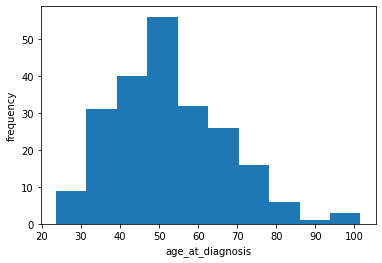

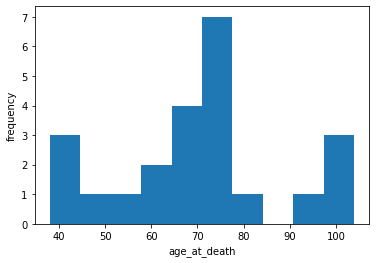

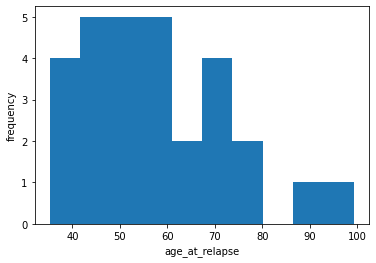

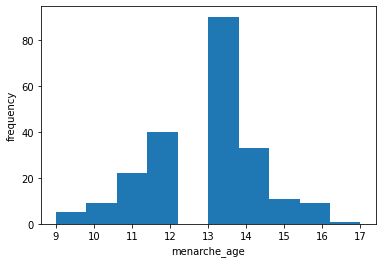

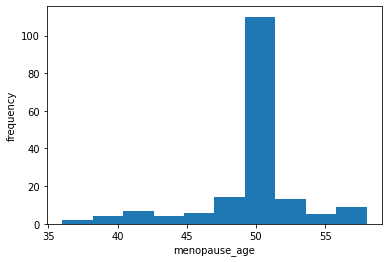

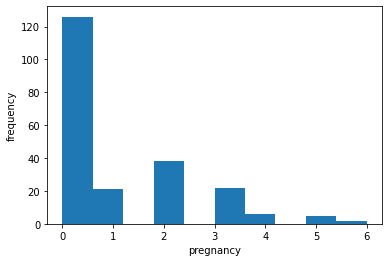

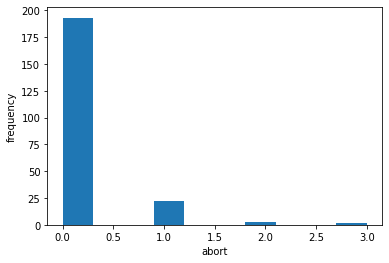

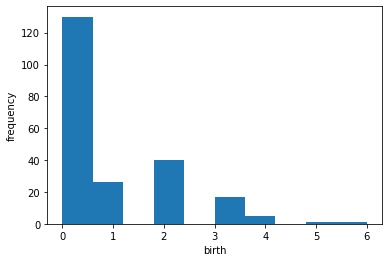

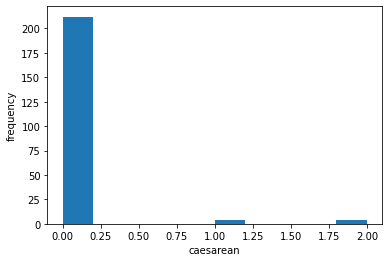

<Figure size 432x288 with 0 Axes>

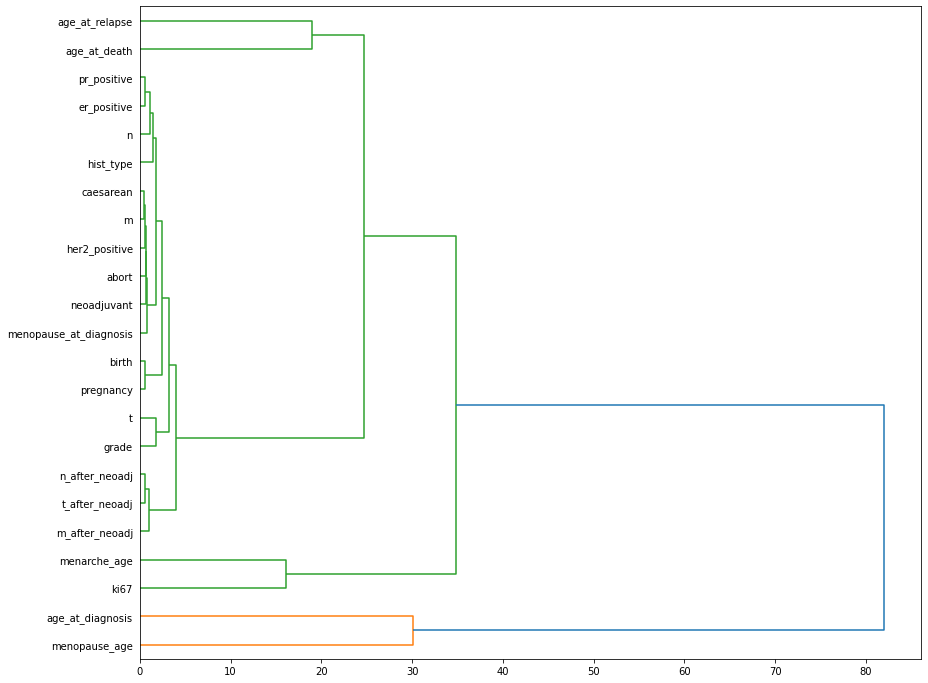

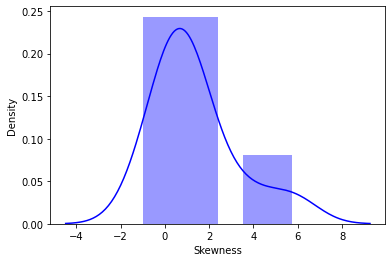

<Figure size 432x288 with 0 Axes>

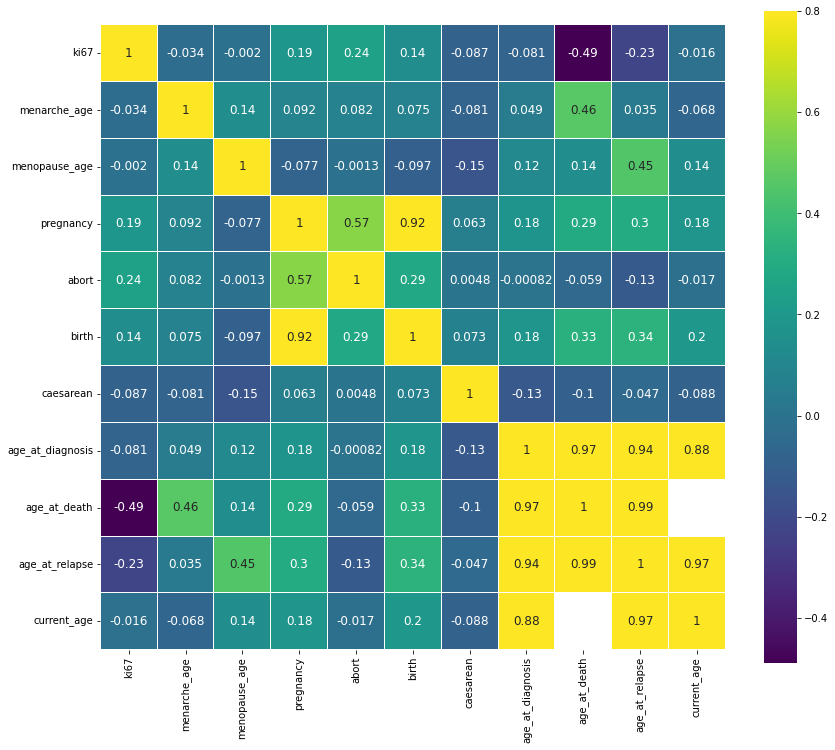

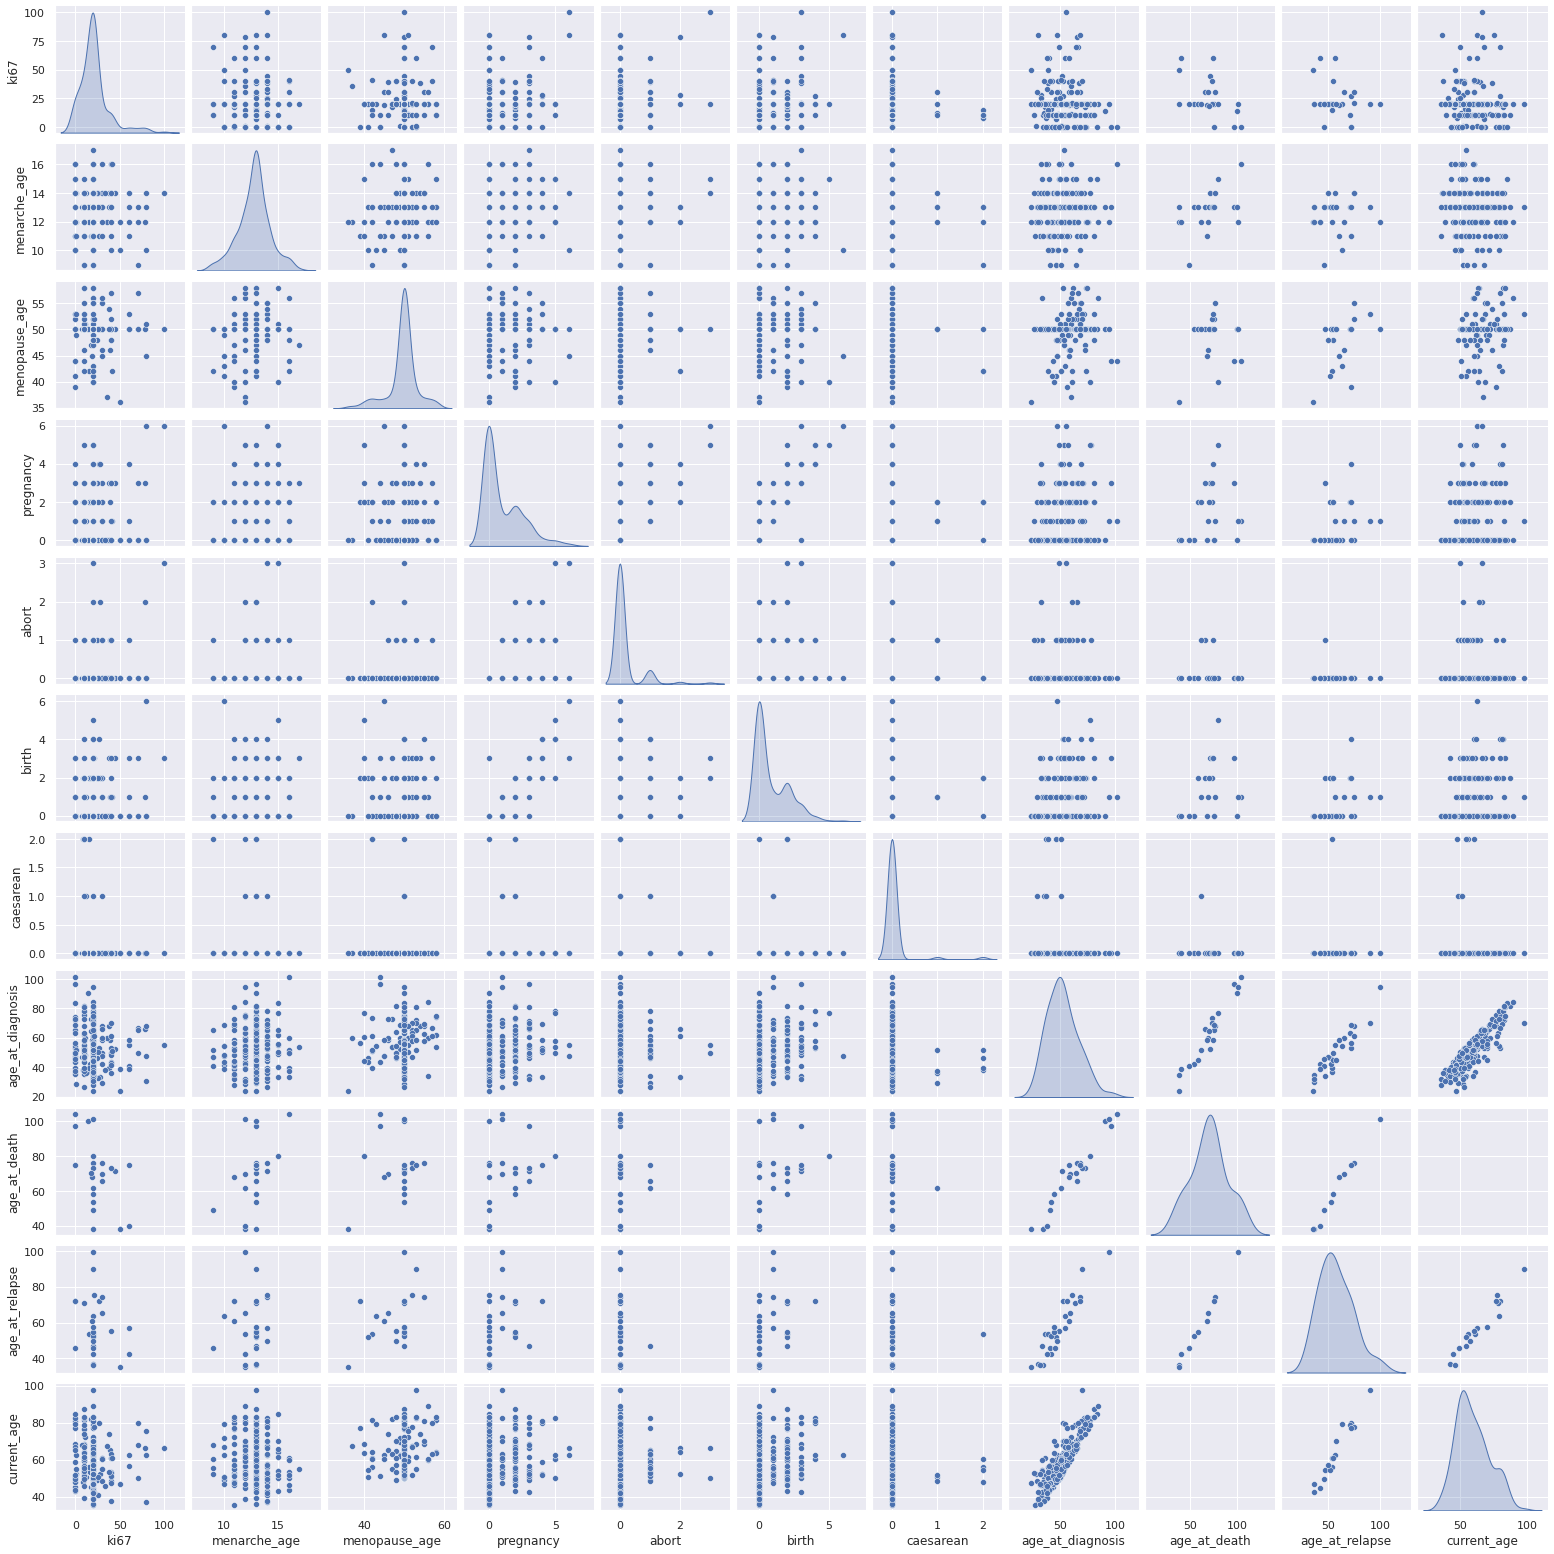

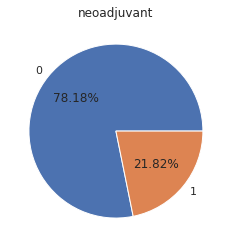

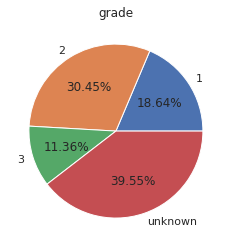

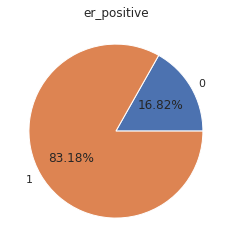

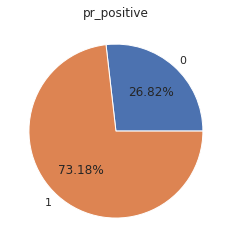

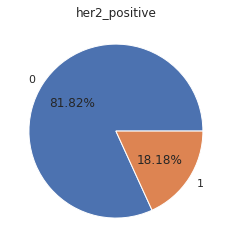

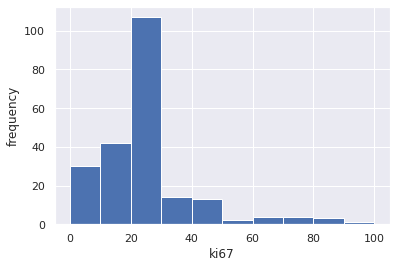

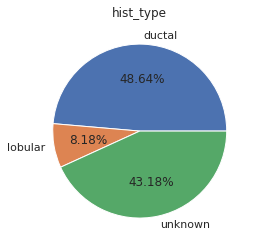

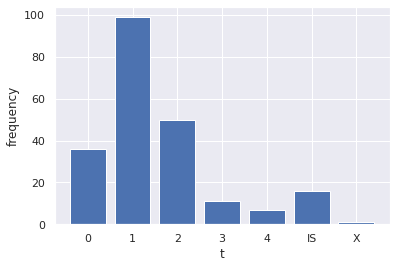

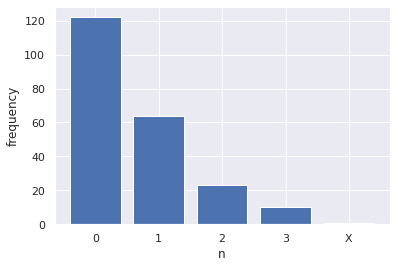

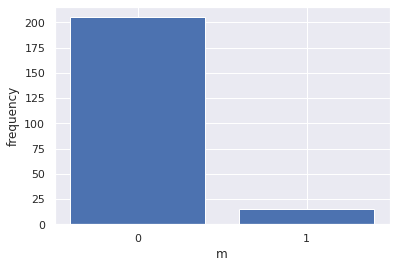

In [ ]:
## PART 7: ANALYSIS 
##### UNIVARIATE ANALYSIS #####

import matplotlib.pyplot as plt 
import seaborn as sns 

# histogram of ages 
for age in ['age_at_diagnosis', 'age_at_death', 'age_at_relapse', 'menarche_age', 'menopause_age']:
    plt.figure()
    plt.hist(df_bcd[age])
    plt.xlabel(age)
    plt.ylabel('frequency')
# The age of the diagnosis is mainly around the interval 45 - 65 years
# For death and relapse, the frequency are not high so we can't evaluate the repartition
# Menarche age is not particular
# Menopause age is maybe biaised with the fill by the mean maybe (around 47) 

# histogram of pregnancy 
for preg in ['pregnancy', 'abort', 'birth', 'caesarean']:
    plt.figure()
    plt.hist(df_bcd[preg])
    plt.xlabel(preg)
    plt.ylabel('frequency')
# The number of pregnancy is between 0 and 3 for the majority, which is 
# not far from a nationnal mean of pregnancy in the occident countries 
# Around 10% had an abortion, and more than 15% had one or two caesariean 

# this encoding will be use for computing a dendrogram of the data 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
enc_cols = [col for col in df_bcd.columns if (df_bcd[col].dtype == "object")
                                           or (df_bcd[col].dtype == "category")]
df_bcd_enc = pd.DataFrame(enc.fit_transform(df_bcd[enc_cols]), columns = enc_cols)
df_bcd_enc.index = df_bcd.index 
num_cols = [col for col in df_bcd.columns if (df_bcd[col].dtype != "object")
                                           and (df_bcd[col].dtype != "category")]
df_bcd_enc = pd.concat([df_bcd_enc, df_bcd[num_cols]], axis=1)

from scipy.cluster.vq import whiten
cols = ['grade', 'er_positive', 'pr_positive', 'her2_positive',
       'hist_type', 't', 'n', 'm', 'neoadjuvant', 't_after_neoadj',
       'n_after_neoadj', 'm_after_neoadj', 'ki67', 'menarche_age',
       'menopause_at_diagnosis', 'menopause_age', 'pregnancy', 'abort',
       'birth', 'caesarean', 'age_at_diagnosis', 'age_at_death', 
       'age_at_relapse']

scaled_data = whiten(df_bcd_enc[cols].fillna(-1).to_numpy().transpose())

from scipy.cluster.hierarchy import fcluster, linkage
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

from scipy.cluster.hierarchy import dendrogram
plt.figure()
f, ax = plt.subplots(figsize = (14,12)) 
d = dendrogram(distance_matrix, labels=df_bcd_enc[cols].columns, orientation="right")

# The dendrogram allows you to more fully correlate variable completion, 
# revealing trends deeper than the pairwise ones visible in the correlation heatmap
# We can confirm the correlation of t n and m, birth, pregnancy and abort

plt.figure()
sns.distplot(df_bcd.skew(),color='blue',axlabel ='Skewness')
# Draw the skewness, it is not high. 

# correlation matrix 
correlation = df_bcd.corr()
k= df_bcd.shape[1]
cols = correlation.index

plt.figure()
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
# The correlation heatmap measures nullity correlation: how strongly 
# the presence or absence of one variable affects the presence of another
# Pregnancy abort and birth are related (normal)
# also t n and m, and same with t n and m after neoadj 
# Age negatively related with age at death (normal)

# pair plot 
sns.set()
columns = df_bcd.columns
sns.pairplot(df_bcd[columns],size = 2 ,kind ='scatter',diag_kind='kde')
# Ages are linearly related (as we saw before)
# Shape of the variables are not a lot skewed
# Several are binary variables

# binary variables 
# neoadjuvant
d = df_bcd.groupby(['neoadjuvant']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('neoadjuvant')
# Less then 1/4 of patient received neoadjuvant chemotherapy

# grade
d = df_bcd.groupby(['grade']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('grade')
# Half of the patients are in grade 2 and 1/3 in grade 1

# er_positive
d = df_bcd.groupby(['er_positive']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('er_positive')
# 80% of the tumor has estrogen receptors

# pr_positive
d = df_bcd.groupby(['pr_positive']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('pr_positive')
# 70% of the tumor has progesteron receptors

# her2_positive
d = df_bcd.groupby(['her2_positive']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('her2_positive')
# near 80% of the tumor doesn't have a HER2 protein overexpression

# Ki67 
plt.figure() 
plt.hist(df_bcd.ki67)
plt.ylabel('frequency')
plt.xlabel('ki67')
print(df_bcd.ki67.describe())
# The percentage for proliferation indicated by the column ki67 is distributed
# mainly between 0% and 30%. The mean is 21%, with a standard deviation of 19 which 
# indicates that the distribution is not concentrated around the mean value. 
# We can notice that more than 75% of the values are under a ki67 of 30%.

# histological type
d = df_bcd.groupby(['hist_type']).count().ehr
plt.figure()
plt.pie(d, labels=d.index, autopct = lambda x: str(round(x, 2)) + '%',)
plt.title('hist_type')
# The histological type of the cancer of the patient is ductal for 86%
# of the patient, and lobular for the others. 

# t 
d = df_bcd[['ehr', 't']].groupby(['t']).count().ehr
plt.figure()
plt.bar(d.index, d)
plt.ylabel('frequency')
plt.xlabel('t')
# Fot T classification, 1 is the most frequent value, then it is 2. 
# The values 4 and X are not a lotpresent. 

# n
d = df_bcd[['ehr', 'n']].groupby(['n']).count().ehr
plt.figure()
plt.bar(d.index, d)
plt.ylabel('frequency')
plt.xlabel('n')
# For N, it is 0 then 1 that are the most frequent. 

# m 
d = df_bcd[['ehr', 'm']].groupby(['m']).count().ehr
plt.figure()
plt.bar(d.index, d)
plt.ylabel('frequency')
plt.xlabel('m')
# For M, the value is mainly 0.


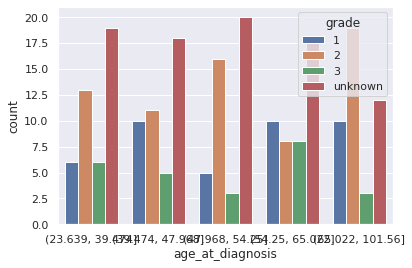

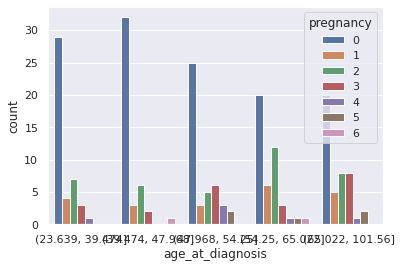

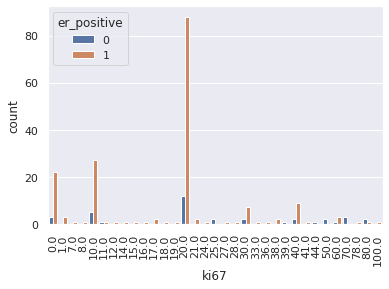

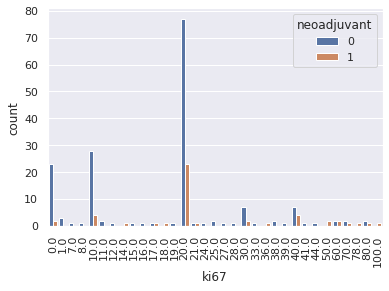

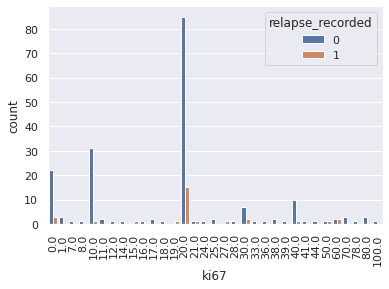

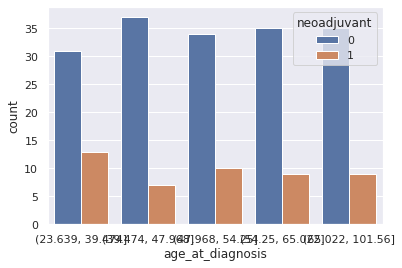

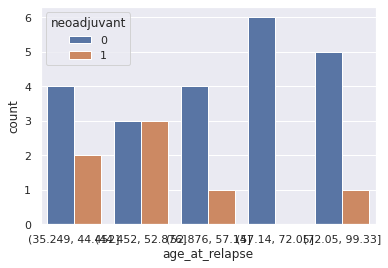

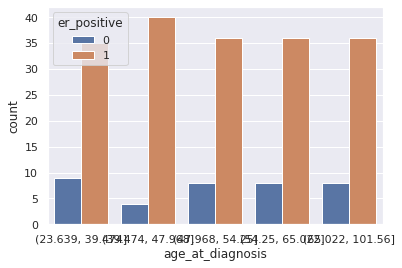

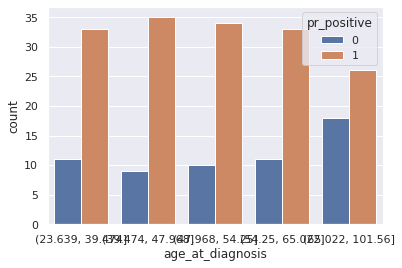

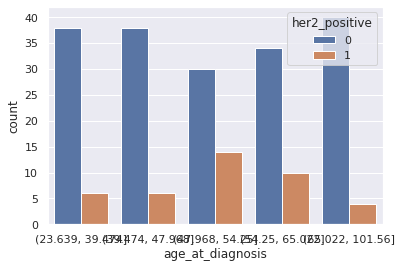

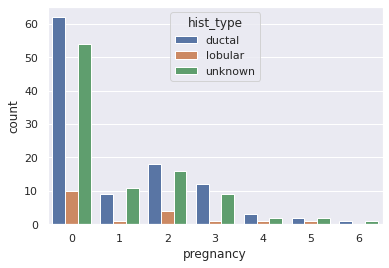

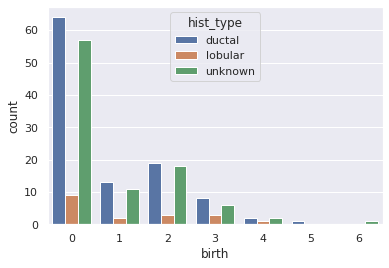

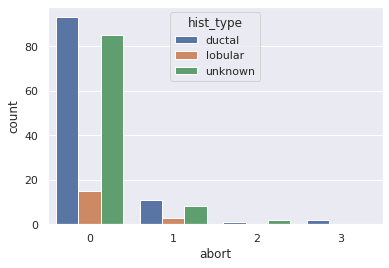

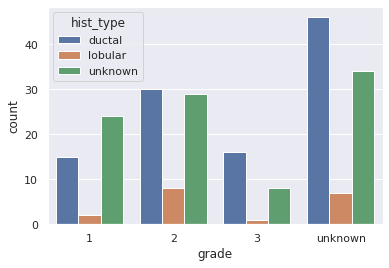

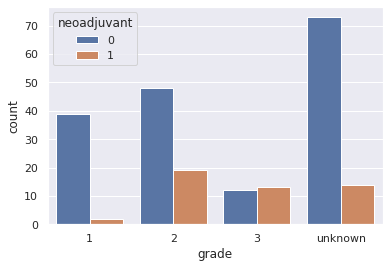

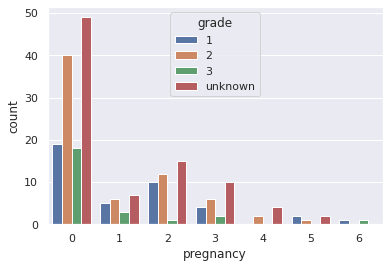

In [ ]:
## PART 7: ANALYSIS
##### BIVARIATE ANALYSIS #####

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['grade'])
# We can observe alarge majority of grade 2 for the oldest patients. 
# The youngest quartile of ages contains more grade 3 than the other quartiles. 
# We can observe more grade 1 for the ages 40-49 and 55-65

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['pregnancy'])
# For the pregnancy, for all ages, patients have mostly never been pregnant. 
# For the ages 55-65, there are as many patients that have never been pregnant
# than patients with two pregnancies.
# For the others quartiles of age, there are less than 10 patients that have been 
# pregnant at least one time. 

plt.figure()
sns.countplot(x=df_bcd['ki67'], hue=df_bcd['er_positive'])
plt.xticks(rotation='vertical')
# The percentage for proliferation can be related to estrogen receptors 
# because we observe some pic at multiples of ten 

plt.figure()
sns.countplot(x=df_bcd['ki67'], hue=df_bcd['neoadjuvant'])
plt.xticks(rotation='vertical')
# The schema is the same as for neoadjuvant 

plt.figure()
sns.countplot(x=df_bcd['ki67'], hue=df_bcd['relapse_recorded'])
plt.xticks(rotation='vertical')
# The schema shows pic at multiple of ten for the not presence of relapse 

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['neoadjuvant'])
# The age of diagnosis doesn't seem related with the neoadjuvant chemotherapy,
# the distribution is the same 

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_relapse'],5), hue=df_bcd['neoadjuvant'])
# for the age of relapse, we can observe that for young ages, more patients have a 
# neoadjuvant chemotherapy than for older ages (more than 53)

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['er_positive'])

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['pr_positive'])

# The age at diagnosis desn't seem to be related to estrogen receptors or 
# progesteron receptors

plt.figure()
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['her2_positive'])
# We can observe a little difference for the middle quartile of age, where there 
# are more patients with HER2 protein overexpression 

plt.figure()
sns.countplot(x=df_bcd['pregnancy'], hue=df_bcd['hist_type'])
# We can observe that the proportion of patients with a ductal histological type of 
# the cancer is really higher for patients with 0 pregnancy.

plt.figure()
sns.countplot(x=df_bcd['birth'], hue=df_bcd['hist_type'])

plt.figure()
sns.countplot(x=df_bcd['abort'], hue=df_bcd['hist_type'])
# figures are similar with the one with pregnancy 

plt.figure()
sns.countplot(x=df_bcd['grade'], hue=df_bcd['hist_type'])
# the proportion of lobular type of cancer if higher for the grade 2 

plt.figure()
sns.countplot(x=df_bcd['grade'], hue=df_bcd['neoadjuvant'])
# neoadjuvant is more given to patients with higher grades 

plt.figure()
sns.countplot(x=df_bcd['pregnancy'], hue=df_bcd['grade'])
# the proportion on grade 2 is higher for patients with 0 pregnancy 

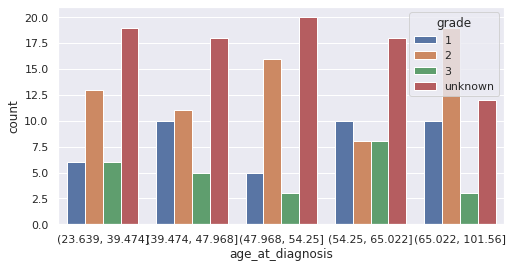

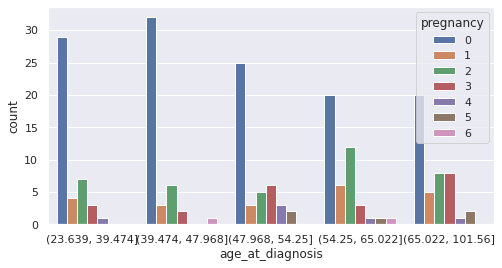

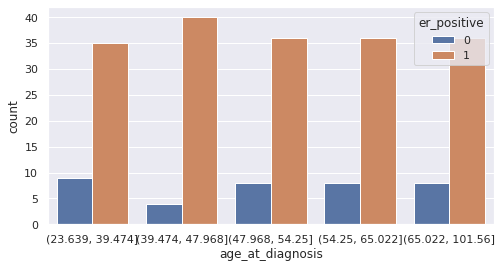

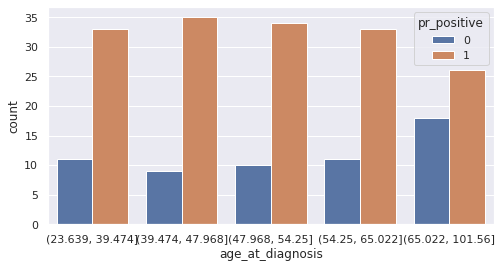

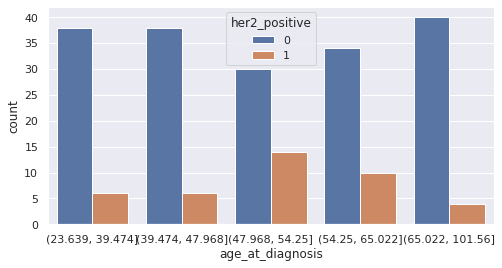

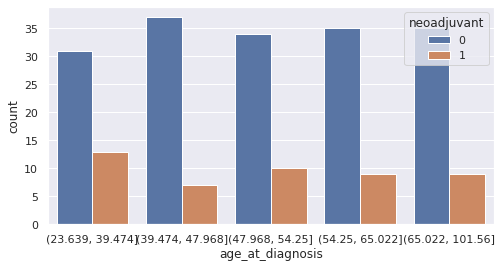

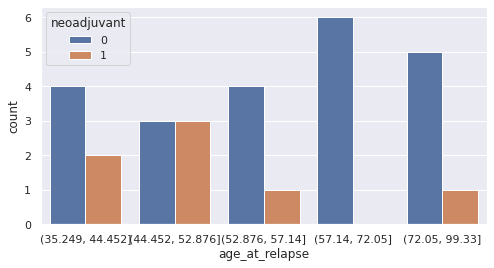

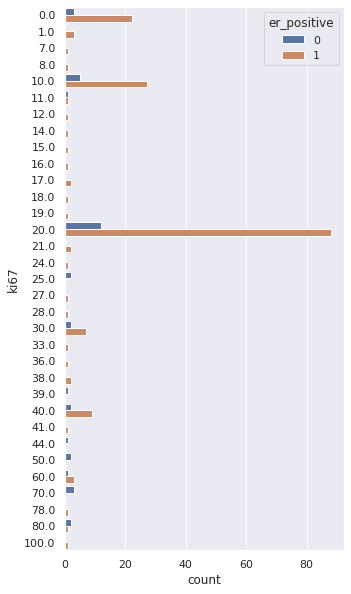

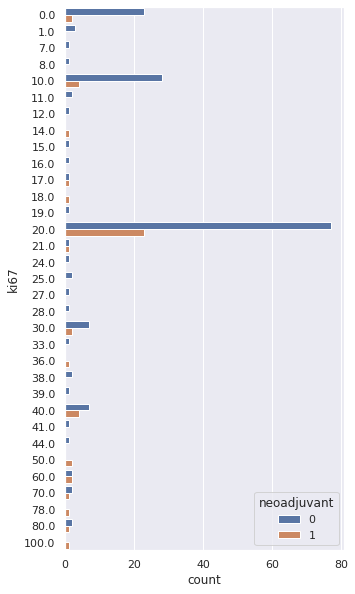

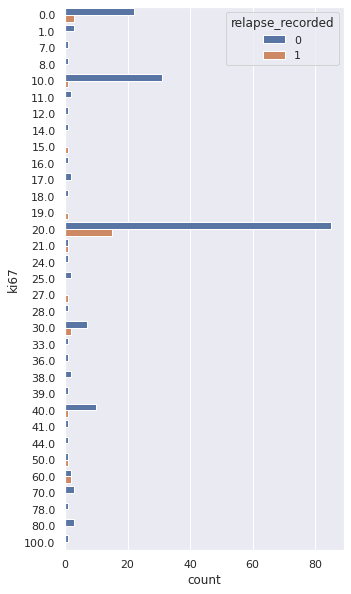

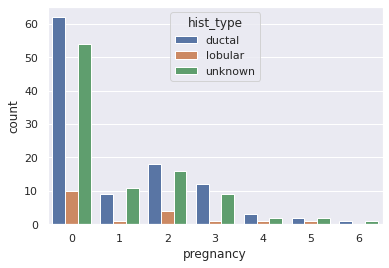

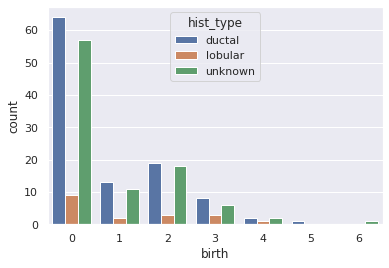

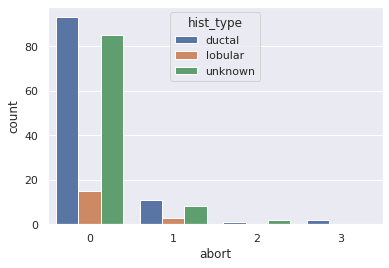

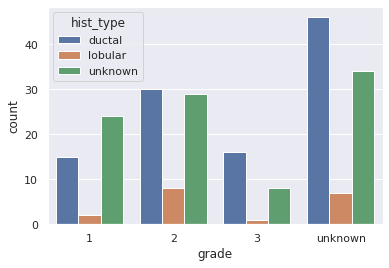

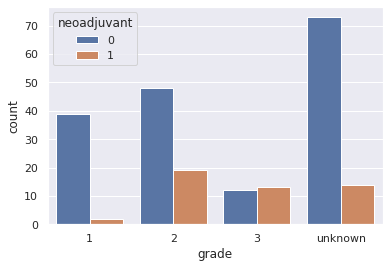

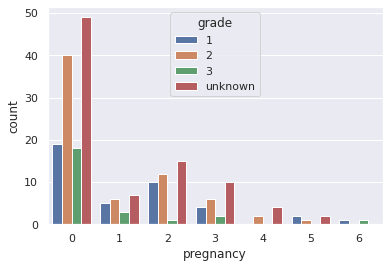

In [11]:
## PART 7: ANALYSIS (little changing) 
##### BIVARIATE ANALYSIS #####

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['grade'])
# We can observe alarge majority of grade 2 for the oldest patients. 
# The youngest quartile of ages contains more grade 3 than the other quartiles. 
# We can observe more grade 1 for the ages 40-49 and 55-65

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['pregnancy'])
# For the pregnancy, for all ages, patients have mostly never been pregnant. 
# For the ages 55-65, there are as many patients that have never been pregnant
# than patients with two pregnancies.
# For the others quartiles of age, there are less than 10 patients that have been 
# pregnant at least one time. 

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['er_positive'])

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['pr_positive'])

# The age at diagnosis desn't seem to be related to estrogen receptors or 
# progesteron receptors

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['her2_positive'])
# We can observe a little difference for the middle quartile of age, where there 
# are more patients with HER2 protein overexpression 

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_diagnosis'],5), hue=df_bcd['neoadjuvant'])
# The age of diagnosis doesn't seem related with the neoadjuvant chemotherapy,
# the distribution is the same 

plt.figure(figsize=(8,4))
sns.countplot(x=pd.qcut(df_bcd['age_at_relapse'],5), hue=df_bcd['neoadjuvant'])
# for the age of relapse, we can observe that for young ages, more patients have a 
# neoadjuvant chemotherapy than for older ages (more than 53)


plt.figure(figsize=(5,10))
sns.countplot(y=df_bcd['ki67'], hue=df_bcd['er_positive'])
plt.xticks(rotation='horizontal')
# The percentage for proliferation can be related to estrogen receptors 
# because we observe some pic at multiples of ten 

plt.figure(figsize=(5,10))
sns.countplot(y=df_bcd['ki67'], hue=df_bcd['neoadjuvant'])
plt.xticks(rotation='horizontal')
# The schema is the same as for neoadjuvant 

plt.figure(figsize=(5,10))
sns.countplot(y=df_bcd['ki67'], hue=df_bcd['relapse_recorded'])
plt.xticks(rotation='horizontal')
# The schema shows pic at multiple of ten for the not presence of relapse 



plt.figure()
sns.countplot(x=df_bcd['pregnancy'], hue=df_bcd['hist_type'])
# We can observe that the proportion of patients with a ductal histological type of 
# the cancer is really higher for patients with 0 pregnancy.

plt.figure()
sns.countplot(x=df_bcd['birth'], hue=df_bcd['hist_type'])

plt.figure()
sns.countplot(x=df_bcd['abort'], hue=df_bcd['hist_type'])
# figures are similar with the one with pregnancy 

plt.figure()
sns.countplot(x=df_bcd['grade'], hue=df_bcd['hist_type'])
# the proportion of lobular type of cancer if higher for the grade 2 

plt.figure()
sns.countplot(x=df_bcd['grade'], hue=df_bcd['neoadjuvant'])
# neoadjuvant is more given to patients with higher grades 

plt.figure()
sns.countplot(x=df_bcd['pregnancy'], hue=df_bcd['grade'])
# the proportion on grade 2 is higher for patients with 0 pregnancy 